### Exercise on Numpy


In [1]:
import numpy as np
arr = np.random.randint(0,10,size=(3,3))
arr

array([[6, 2, 2],
       [9, 7, 4],
       [8, 3, 6]])

In [10]:
## Get indices of lower triangle (6,9,7,8,3,6)
## tril - triangle of lower indices

''' Output
(array([0, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 0, 1, 0, 1, 2], dtype=int64))
 how to read it - 0,0 1,0 1,1 2,0 2,1 2,2
 where lower triangle is allocated
 '''

c=np.tril_indices(3)
c


(array([0, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 0, 1, 0, 1, 2], dtype=int64))

In [11]:
## these indices can then be used to extract  value from array of lower triangle
arr[c[0],c[1]]

array([6, 9, 7, 8, 3, 6])

In [13]:
## Same for upper triangle (6,2,2,7,4,6)
u=np.triu_indices(3)
u

(array([0, 0, 0, 1, 1, 2], dtype=int64),
 array([0, 1, 2, 1, 2, 2], dtype=int64))

In [15]:
arr

array([[6, 2, 2],
       [9, 7, 4],
       [8, 3, 6]])

In [17]:
arr[u[0],u[1]]

array([6, 2, 2, 7, 4, 6])

In [19]:
## When row indices = column indices - it is principal triangle
np.diag_indices(3)

(array([0, 1, 2]), array([0, 1, 2]))

### Given a matrix mat of size 3 x 3. Find the maximum numbers from each row, say N1, N2 and N3. Result in a matrix by adding:

* N1 to the upper half elements of mat
* N2 to the main diagonal elements of mat
* N3 to the lower half elements of mat

In [20]:
import numpy as np
mat = np.array([[10,5,9],
                [2,20,6],
                [8,3,30]]).reshape(3,3)
 

In [22]:
mat

array([[10,  5,  9],
       [ 2, 20,  6],
       [ 8,  3, 30]])

In [23]:
l=np.tril_indices(3)
u=np.triu_indices(3)
d=np.diag_indices(3)
N1=mat[u[0],u[1]]
N1

array([10,  5,  9, 20,  6, 30])

In [24]:
N2=mat[d[0],d[1]]
N2

array([10, 20, 30])

In [26]:
N3=mat[l[0],l[1]]
N3

array([10,  2, 20,  8,  3, 30])

In [37]:
lower_rows=l[0][l[0]!=l[1]]
lower_rows

array([1, 2, 2], dtype=int64)

In [38]:
lower_cols=l[1][l[0]!=l[1]]
lower_cols

array([0, 0, 1], dtype=int64)

In [40]:
## Lower half of array without diagonal indices
mat[lower_rows,lower_cols]

array([2, 8, 3])

In [48]:
##Add N3 to lower half

mat[lower_rows,lower_cols] += N2
mat

array([[10,  5,  9],
       [12, 20,  6],
       [28, 33, 30]])

In [50]:
upper_rows=u[1][u[0]!=u[1]]
upper_rows
upper_cols=u[1][u[0]!=u[1]]
upper_cols
mat[upper_rows,upper_cols] += N2

In [51]:
mat

array([[10,  5,  9],
       [12, 30,  6],
       [28, 33, 60]])


## Pandas


In [52]:
import pandas as pd

In [54]:
dict={'a':[1,2,3,4]}
df=pd.DataFrame(dict)

In [55]:
type(df)

pandas.core.frame.DataFrame

In [56]:
df

,a
0,1
1,2
2,3
3,4


In [57]:
pd.DataFrame({
    'a':[1,2,3,4],
    'b':[5,4,6,7]
}
)

,a,b
0,1,5
1,2,4
2,3,6
3,4,7


In [59]:
##Can add multiple dictionaries
## First dictionary will become first row, second is second row and so on
## for mismaching key or val data, df will fill in the values 

lst=[{"C1":1 , "C2":2},
        {"C1":5,"C2":10,"C3":20}
    ]
print(pd.DataFrame(lst))

   C1  C2    C3
0   1   2   NaN
1   5  10  20.0


In [61]:
## Can give row names
print(pd.DataFrame(lst, index=["R1","R2"]))

    C1  C2    C3
R1   1   2   NaN
R2   5  10  20.0


In [67]:
## Data fill in examples
df = pd.DataFrame({'A': [10., 20.],
                    'B': "text",
                    'C': [2,60],
                    'D': 3+9j})
df

,A,B,C,D
0,10.0,text,2,(3+9j)
1,20.0,text,60,(3+9j)


In [68]:
## Access data by column names
df["A"]

0    10.0
1    20.0
Name: A, dtype: float64

In [69]:
## Dataframe is collection of a series
type(df['A'])

pandas.core.series.Series

In [74]:
df=pd.DataFrame({'A': [10., 20.],
                    'B': "text",
                    'C': [2,60],
                    'D': 3+9j},index=["R1","R2"])
df

,A,B,C,D
R1,10.0,text,2,(3+9j)
R2,20.0,text,60,(3+9j)


### Explore public data

In [90]:
data=pd.read_csv('adult.data',names=["age","workclass","fnlwgt","education",
                                     "education-num","marital-status","occupation","relationship",
                                     "race","sex","capital-gain","capital-loss","hours-per-week","native-country"]
                 ,index_col=False
                )


In [89]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [91]:
data.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States


In [92]:
data.shape

(32561, 14)

In [96]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [103]:
data.rename(columns={'education':"Education"},inplace=True)

In [106]:
## iloc to access (row,columns) pass index from:end in parameter
data.iloc[:3,:5]

,age,workclass,fnlwgt,Education,education-num
0,39,State-gov,77516,Bachelors,13
1,50,Self-emp-not-inc,83311,Bachelors,13
2,38,Private,215646,HS-grad,9


In [108]:
## Add steps in row access
data.iloc[:6:2,:5]

,age,workclass,fnlwgt,Education,education-num
0,39,State-gov,77516,Bachelors,13
2,38,Private,215646,HS-grad,9
4,28,Private,338409,Bachelors,13


In [107]:
pd.unique(data['race'])

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [110]:
## loc indexing - access specific data points by row,column
data.loc[0,"age"]

39

In [111]:
data.loc[:3,"age":"Education"]

,age,workclass,fnlwgt,Education
0,39,State-gov,77516,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors
2,38,Private,215646,HS-grad
3,53,Private,234721,11th


In [113]:
data[["age","Education"]].head()

,age,Education
0,39,Bachelors
1,50,Bachelors
2,38,HS-grad
3,53,11th
4,28,Bachelors


### Boolean indexing

In [116]:
data_age_30=data[data["age"]>30]

In [127]:
## Extract all the data of all workclass=private
data_workclass_private=data[(data["workclass"]==" Private") & (data["age"]>50)]
data_workclass_private.head()

,age,workclass,fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States
46,53,Private,144361,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States


In [134]:
## Because true=1 and false=0 = sum will add up all 1's
sum((data["workclass"]==" Private") & (data["age"]>50))

3587

In [135]:
data_workclass_private.count()

age               3587
workclass         3587
fnlwgt            3587
Education         3587
education-num     3587
marital-status    3587
occupation        3587
relationship      3587
race              3587
sex               3587
capital-gain      3587
capital-loss      3587
hours-per-week    3587
native-country    3587
dtype: int64

### Grouping

In [139]:
## Give counts by work -class
data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [140]:
## Get unique values of columns
data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

### Data cleaning

In [143]:
## Remove extra spaces from data - above code has extra leading space in data values
data["workclass"].str.strip().unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [144]:
## Add cleaned up data as new column in dataframe
data["workclass-strip"]=data["workclass"].str.strip()
data.head()

,age,workclass,fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass-strip
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,State-gov
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Self-emp-not-inc
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Private
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Private


In [150]:
## check if dataframe has any null values
data.isnull().head()

,age,workclass,fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass-strip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [155]:
## Clean all values with ? - convert to Nan so later can be ignore
## Apply function - apply given function to all rows in dataframe

def func(x):
    if x.strip() in ["?","na"]:
        return np.nan
    else:
        return x.strip()
    
data["workclass-strip"]=data["workclass"].apply(func)
data["workclass-strip"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [176]:
## Exercise - pass multiple columns apply
# func prints first value of each column represented as x
## axis = 1 will give [col values1,col values2] - one row + one colum access
## axis = 0 will give column1+all rows , col2+allrows access

def func2(x):
    return x['workclass']+"_"+x['Education']
    
data["multi-column"]=data[["workclass","Education"]].apply(func2,axis=1)
data["multi-column"].head()

0            State-gov_ Bachelors
1     Self-emp-not-inc_ Bachelors
2                Private_ HS-grad
3                   Private_ 11th
4              Private_ Bachelors
Name: multi-column, dtype: object

In [177]:
## Clean all NaN values -
## Previous ? values replaced with NaN and ignored in value counts

data["workclass-strip"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass-strip, dtype: int64

In [184]:
## Previous count of 1836 for ? is replaced by nulls
sum(data["workclass-strip"].isnull())

1836

In [190]:
## Clean all Nan value data - new count is 30725 -1836 null values removed
wo_na=data["workclass-strip"].dropna()
sum(wo_na.isnull())

0

In [195]:
## Replace Nan with any custom data
sum(data["workclass-strip"].isnull())
fill_na=data["workclass-strip"].fillna("new data")
fill_na.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
new data             1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass-strip, dtype: int64

In [197]:
## mode() fill data with most frequent value in dataframe
fill_mode=data["workclass-strip"].fillna(data["workclass-strip"].mode()[0])
fill_mode.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass-strip, dtype: int64

In [199]:
## Pivot table
data.pivot_table(values="capital-gain", index="age", columns="workclass-strip").head()

workclass-strip,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
age,,,,,,,,
17,0.0,0.0,0.0,27.260000,0.0,0.000000,0.000000,NaN
18,0.0,0.0,0.0,131.598063,0.0,42.428571,0.000000,NaN
19,0.0,0.0,NaN,89.450000,0.0,0.000000,28.285714,0.0
20,0.0,0.0,0.0,45.772806,0.0,0.000000,0.000000,NaN
21,0.0,66.0,NaN,230.694974,0.0,450.800000,0.000000,0.0


### Apply func with lambda

In [200]:
##Lambda is anonymous function - without name or signature
## with func apply will send every row to func lambda

data["workclass-lambda"]=data["workclass"].apply(
lambda x : np.nan if x.strip() == "?" else x.strip()
)
data["workclass-lambda"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [202]:
## Assign lambda function to a varibale
var = lambda x:x+5
var(5)

10

### Sorting

In [213]:
country_sorted=data.sort_values(by="native-country",ascending=False)
country_sorted.head()

,age,workclass,fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass-strip,multi-column,workclass-lambda
12816,31,Private,182177,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,Private,Private_ Bachelors,Private
30543,22,Private,180060,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,Yugoslavia,Private,Private_ HS-grad,Private
1025,56,Private,169133,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,Private,Private_ HS-grad,Private
31519,29,Private,273051,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,52,Yugoslavia,Private,Private_ Bachelors,Private
7287,35,Private,164526,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,Private,Private_ HS-grad,Private


In [218]:
## After sorting - reset indexes
country_sorted.reset_index().head()


,index,age,workclass,fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass-strip,multi-column,workclass-lambda
0,12816,31,Private,182177,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,Private,Private_ Bachelors,Private
1,30543,22,Private,180060,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,Yugoslavia,Private,Private_ HS-grad,Private
2,1025,56,Private,169133,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,Private,Private_ HS-grad,Private
3,31519,29,Private,273051,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,52,Yugoslavia,Private,Private_ Bachelors,Private
4,7287,35,Private,164526,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,Private,Private_ HS-grad,Private


### Grouping

In [222]:
work_group=data.groupby(by=["workclass-strip","Education"])
work_group.count()

age  workclass  fnlwgt  education-num  \
workclass-strip  Education                                              
Federal-gov       10th            6          6       6              6   
                  11th            9          9       9              9   
                  12th            5          5       5              5   
                  5th-6th         1          1       1              1   
                  7th-8th         2          2       2              2   
                  9th             3          3       3              3   
                  Assoc-acdm     55         55      55             55   
                  Assoc-voc      38         38      38             38   
                  Bachelors     212        212     212            212   
                  Doctorate      16         16      16             16   
                  HS-grad       263        263     263            263   
                  Masters        67         67      67             67   
                  Prof-school    29         29      29             29   
                  Some-college  254        254     254            254   
Local-gov         10th           31         31      31             31   
                  11th           36         36      36             36   
                  12th           19         19      19             19   
                  1st-4th         4          4       4              4   
                  5th-6th         9          9       9              9   
                  7th-8th        28         28      28             28   
                  9th            23         23      23             23   
                  Assoc-acdm     88         88      88             88   
                  Assoc-voc      86         86      86             86   
                  Bachelors     477        477     477            477   
                  Doctorate      27         27      27             27   
                  HS-grad       503        503     503            503   
                  Masters       342        342     342            342   
                  Preschool       4          4       4              4   
                  Prof-school    29         29      29             29   
                  Some-college  387        387     387            387   
...                             ...        ...     ...            ...   
Self-emp-not-inc  7th-8th        94         94      94             94   
                  9th            34         34      34             34   
                  Assoc-acdm     71         71      71             71   
                  Assoc-voc     108        108     108            108   
                  Bachelors     399        399     399            399   
                  Doctorate      50         50      50             50   
                  HS-grad       866        866     866            866   
                  Masters       124        124     124            124   
                  Prof-school   131        131     131            131   
                  Some-college  486        486     486            486   
State-gov         10th           13         13      13             13   
                  11th           14         14      14             14   
                  12th           10         10      10             10   
                  1st-4th         1          1       1              1   
                  5th-6th         4          4       4              4   
                  7th-8th        10         10      10             10   
                  9th             6          6       6              6   
                  Assoc-acdm     41         41      41             41   
                  Assoc-voc      46         46      46             46   
                  Bachelors     270        270     270            270   
                  Doctorate      89         89      89             89   
                  HS-grad       268        268     268            268   
                 

In [223]:
work_group.sum()

age     fnlwgt  education-num  capital-gain  \
workclass-strip  Education                                                      
Federal-gov       10th            326     772317             36          3471   
                  11th            390    1463180             63         17758   
                  12th            180     731018             40             0   
                  5th-6th          35     205584              3             0   
                  7th-8th         112     287862              8             0   
                  9th             104     296087             15             0   
                  Assoc-acdm     2229   10261564            660         32964   
                  Assoc-voc      1580    7370286            418         42791   
                  Bachelors      8758   36222671           2756        169161   
                  Doctorate       786    2930742            256         34434   
                  HS-grad       11392   51063304           2367         77448   
                  Masters        3042   12443721            938         96570   
                  Prof-school    1176    5410293            435        167783   
                  Some-college  10777   48353765           2540        157523   
Local-gov         10th           1345    5397328            186        105012   
                  11th           1250    7614771            252         10841   
                  12th            757    4181408            152          2009   
                  1st-4th         218     890424              8             0   
                  5th-6th         463    1791807             27             0   
                  7th-8th        1459    4849081            112         10595   
                  9th            1102    3701412            115             0   
                  Assoc-acdm     3448   18766629           1056        129463   
                  Assoc-voc      3498   17092003            946         32100   
                  Bachelors     18656   90506066           6201        597736   
                  Doctorate      1398    5049481            432         53492   
                  HS-grad       21603   94394420           4527        264181   
                  Masters       15494   59865951           4788        420794   
                  Preschool       179     687277              4             0   
                  Prof-school    1282    4888925            435         28869   
                  Some-college  15233   75145936           3870        187172   
...                               ...        ...            ...           ...   
Self-emp-not-inc  7th-8th        5036   15087705            376         32146   
                  9th            1534    6483666            170          6046   
                  Assoc-acdm     2950   13372590            852         48860   
                  Assoc-voc      4395   15458102           1188         40857   
                  Bachelors     17749   73486766           5187        805742   
                  Doctorate      2375    9602451            800        203310   
                  HS-grad       38812  150002789           7794       1237841   
                  Masters        5947   22270734           1736        468422   
                  Prof-school    6239   24322203           1965       1361080   
                  Some-college  21363   82874714           4860        537928   
State-gov         10th            562    2840194             78             0   
                  11th            484    2497873             98             0   
                  12th            364    1484300             80          4101   
                  1st-4th          81     132204              2             0   
                  5th-6th         152    1127792             12             0   
                  7th-8th         550    1700329             40             0   
                  9th             332     938564             30  

### Merging

In [225]:
### Merge dataframes on keys
data1 = pd.DataFrame({"A":[1,2,3,4,5],
                      "B":[6,7,8,9,0]})
data1


,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,0


In [226]:
data2 = pd.DataFrame({"A":[4,8,6,3,2],
                      "C":[2,3,8,9,4]})
data2

,A,C
0,4,2
1,8,3
2,6,8
3,3,9
4,2,4


In [229]:
## Merge will do merging on matching keys - inner join
pd.merge(data1,data2)

,A,B,C
0,2,7,4
1,3,8,9
2,4,9,2


In [231]:
#Left outer join - non mtching ones will be replaced with Nan
pd.merge(data1,data2,how='left')

,A,B,C
0,1,6,NaN
1,2,7,4.0
2,3,8,9.0
3,4,9,2.0
4,5,0,NaN


In [232]:
pd.merge(data1,data2,how='right')

,A,B,C
0,2,7.0,4
1,3,8.0,9
2,4,9.0,2
3,8,NaN,3
4,6,NaN,8


In [233]:
pd.merge(data1,data2,how='outer')

,A,B,C
0,1,6.0,NaN
1,2,7.0,4.0
2,3,8.0,9.0
3,4,9.0,2.0
4,5,0.0,NaN
5,8,NaN,3.0
6,6,NaN,8.0


In [235]:
# When keys dont match - we need to provide keys
data3= pd.DataFrame({"E":[4,8,6,3,2],
                      "F":[2,3,8,9,4]})
data3

,E,F
0,4,2
1,8,3
2,6,8
3,3,9
4,2,4


In [239]:
pd.merge(data1,data3,left_on="A",right_on="E")

,A,B,E,F
0,2,7,2,4
1,3,8,3,9
2,4,9,4,2


In [242]:
pd.merge(data1,data3,left_on="A",right_on="E",how='outer')

TypeError: merge() got an unexpected keyword argument 'validate'

### Plotting

In [246]:
%matplotlib inline

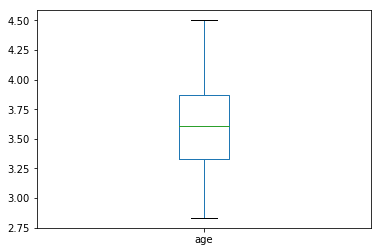

In [251]:
np.log(data['age']).plot(kind='box')

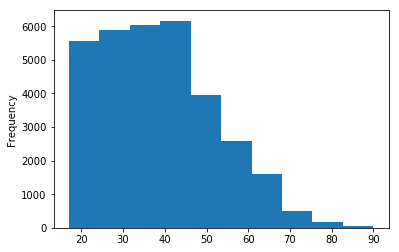

In [252]:
data['age'].plot(kind='hist')

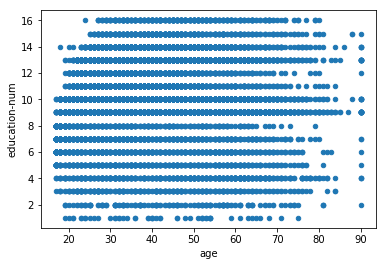

In [256]:
data[['age','education-num']].plot(x='age',y='education-num',kind='scatter')

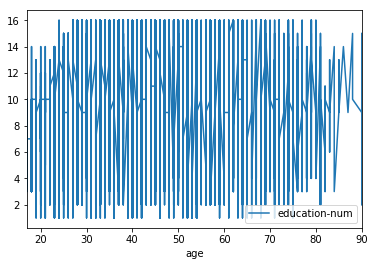

In [261]:
data.sort_values(by="age").plot(x= 'age',y='education-num',kind='line')

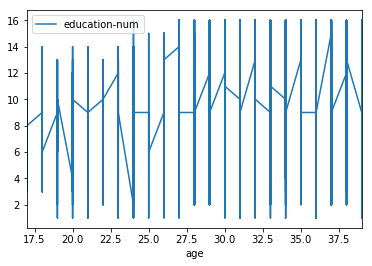

In [262]:
data[data['age']<40].sort_values(by="age").plot(x= 'age',y='education-num',kind='line')

In [264]:
## frequency of all workclass count
data.groupby(by="workclass-strip").count()['age']

workclass-strip
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: age, dtype: int64

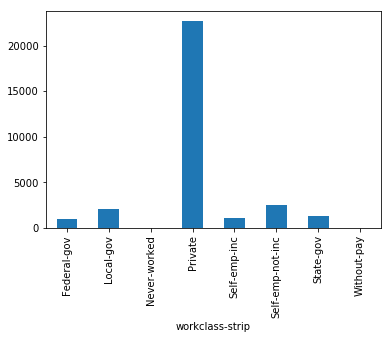

In [265]:
data.groupby(by="workclass-strip").count()['age'].plot(kind='bar')

In [267]:
## Write updated data back to csv
#index = false to not write row index as column in final file
data.to_csv("adult.csv",index=False)

In [269]:
data.to_excel("adult.xlsx",sheet_name="adult",index=False)